In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [2]:
from scripts import utils,dataset,DTI

In [3]:
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'CNN'
target_encoding = 'CNN'

In [5]:
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random', frac = [0.7,0.1,0.2])

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


In [6]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12])

In [7]:
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.4497. Total time 0.00027 hours
Validation at Epoch 1 with loss:0.67265, MSE: 0.79520 , Pearson Correlation: 0.43537 with p-value: 2.68374 , Concordance Index: 0.73274
Training at Epoch 2 iteration 0 with loss 0.81052. Total time 0.03277 hours
Validation at Epoch 2 with loss:0.82737, MSE: 0.69749 , Pearson Correlation: 0.41822 with p-value: 1.32347 , Concordance Index: 0.76591
Training at Epoch 3 iteration 0 with loss 0.91019. Total time 0.06611 hours
Validation at Epoch 3 with loss:0.44742, MSE: 0.58934 , Pearson Correlation: 0.52626 with p-value: 8.02540 , Concordance Index: 0.77765
Training at Epoch 4 iteration 0 with loss 0.56947. Total time 0.09972 hours
Validation at Epoch 4 with loss:0.65135, MSE: 0.74896 , Pearson Correlation: 0.55997 with p-value: 9.49510 , Concordance Index: 0.78846
Training at Epoch 5 iteration 0 with loss 0.85107. Total time 0.13305 hours
Validation

Training at Epoch 40 iteration 0 with loss 0.32574. Total time 1.08222 hours
Validation at Epoch 40 with loss:0.43214, MSE: 0.33759 , Pearson Correlation: 0.77616 with p-value: 0.0 , Concordance Index: 0.86628
Training at Epoch 41 iteration 0 with loss 0.35293. Total time 1.10805 hours
Validation at Epoch 41 with loss:0.27787, MSE: 0.33291 , Pearson Correlation: 0.77819 with p-value: 0.0 , Concordance Index: 0.85656
Training at Epoch 42 iteration 0 with loss 0.24307. Total time 1.13444 hours
Validation at Epoch 42 with loss:0.33081, MSE: 0.32903 , Pearson Correlation: 0.79214 with p-value: 0.0 , Concordance Index: 0.86709
Training at Epoch 43 iteration 0 with loss 0.37829. Total time 1.16055 hours
Validation at Epoch 43 with loss:0.18853, MSE: 0.31102 , Pearson Correlation: 0.79429 with p-value: 0.0 , Concordance Index: 0.86433
Training at Epoch 44 iteration 0 with loss 0.24183. Total time 1.18666 hours
Validation at Epoch 44 with loss:0.22967, MSE: 0.31137 , Pearson Correlation: 0.799

Validation at Epoch 79 with loss:0.36253, MSE: 0.27521 , Pearson Correlation: 0.83592 with p-value: 0.0 , Concordance Index: 0.88649
Training at Epoch 80 iteration 0 with loss 0.16094. Total time 2.11972 hours
Validation at Epoch 80 with loss:0.30267, MSE: 0.24088 , Pearson Correlation: 0.84341 with p-value: 0.0 , Concordance Index: 0.88890
Training at Epoch 81 iteration 0 with loss 0.11338. Total time 2.14444 hours
Validation at Epoch 81 with loss:0.23492, MSE: 0.23267 , Pearson Correlation: 0.84626 with p-value: 0.0 , Concordance Index: 0.88859
Training at Epoch 82 iteration 0 with loss 0.14204. Total time 2.16972 hours
Validation at Epoch 82 with loss:0.35025, MSE: 0.24974 , Pearson Correlation: 0.83791 with p-value: 0.0 , Concordance Index: 0.89112
Training at Epoch 83 iteration 0 with loss 0.14219. Total time 2.195 hours
Validation at Epoch 83 with loss:0.27613, MSE: 0.27804 , Pearson Correlation: 0.83546 with p-value: 0.0 , Concordance Index: 0.88638
Training at Epoch 84 iteratio

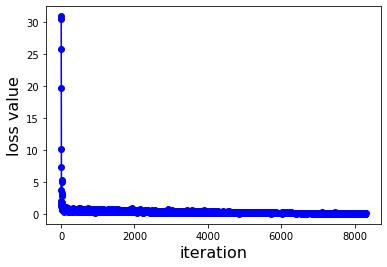

In [8]:
model.train(train, val, test)

In [9]:
model.save_model('./save_model/model_DeepDTA_Davis')